In [ ]:
#remove at the end
# from google.colab import drive
# drive.mount('/content/drive')
# %cd drive/MyDrive/Pattern recognition and machine learning/fma/submission
# !ls 
# !pip install python-dotenv

Mounted at /content/drive
/content/drive/MyDrive/Pattern recognition and machine learning/fma/submission
'Copie de predict_year.ipynb'   __pycache__	        X_test_CNN.npy
 data_distribution.png	        spectrograms	        X_test_SVM.npy
 dataset.csv		        svm_model_linear.sav    X_train_CNN.npy
 features.csv		        svm_model_poly.sav      X_train_SVM.npy
 intro_cnn_my_model.h5	        svm_model_rbf.sav       X_val_CNN.npy
 intro_DenseNet121.h5	        svm_model_sigmoid.sav   X_val_SVM.npy
 intro_resnet_18_2.h5	        test_hist.png	        Y_test_CNN.npy
 intro_resnet_18.h5	        test.ipynb	        Y_test_SVM.npy
 intro_resnet_final.h5	        test_spectrograms       Y_train_CNN.npy
 model.h5		        tracks.csv	        Y_train_SVM.npy
 plots_intro		        train.ipynb	        Y_val_CNN.npy
 predict_year.ipynb	        Untitled	        Y_val_SVM.npy
 Preprocessing.ipynb	        utils.py


In [ ]:
# load input and output as numpy array from npy file
from numpy import load
from PIL import Image
# load array
X_train= load('X_train_CNN.npy')
Y_train=load('Y_train_CNN.npy')

X_val= load('X_val_CNN.npy')
Y_val=load('Y_val_CNN.npy')

X_test= load('X_test_CNN.npy')
Y_test=load('Y_test_CNN.npy')

In [ ]:
#retrain resnet
from tensorflow.keras import applications
import pandas as pd
import numpy as np
import os
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping


img_width=323
img_height=128

model = applications.ResNet50(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

x = model.output
x = Flatten()(x)

#x = Dense(256, activation="relu")(x)
predictions = Dense(17, activation="softmax")(x)

# creating the final model 
model_final = Model(inputs = model.input, outputs = predictions)


#compile model using accuracy to measure model performance
model_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#save wights
checkpoint = ModelCheckpoint("model.h5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='auto', period=1) 
#train the model
hist=model_final.fit(X_train, Y_train, batch_size=64, epochs=50,validation_data=(X_val, Y_val),callbacks=[checkpoint],shuffle=True)



94773248/94765736 [==============================] - 1s 0us/step
Epoch 1/2
66/66 [==============================] - 51s 575ms/step - loss: 5.7582 - accuracy: 0.1317 - val_loss: 42.7009 - val_accuracy: 0.0996

Epoch 00001: val_accuracy improved from -inf to 0.09962, saving model to just_test.h5
Epoch 2/2
66/66 [==============================] - 36s 549ms/step - loss: 2.6380 - accuracy: 0.1579 - val_loss: 2.6578 - val_accuracy: 0.0996

Epoch 00002: val_accuracy did not improve from 0.09962


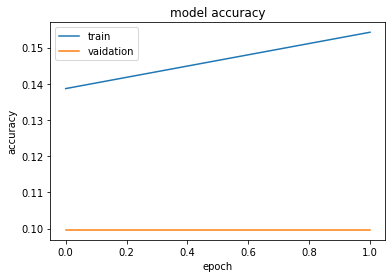

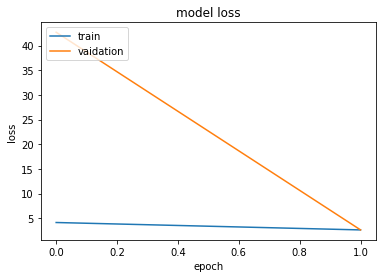

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'vaidation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'vaidation'], loc='upper left')
plt.show()